<a href="https://colab.research.google.com/github/superaja/learnings/blob/master/fastai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install fastai==0.7.0
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
import torch
!pip install Pillow==4.0.0
!pip install image
%matplotlib inline
from fastai.imports import *

In [35]:
!pip3 install image

In [1]:
!pip install fastai==0.7.0
!pip3 install torchvision # need to find the version
!pip3 install torchtext==0.2.3
!pip3 install pillow==4.0.0

    100% |████████████████████████████████| 122kB 3.9MB/s 
    100% |████████████████████████████████| 3.6MB 1.3MB/s 
    100% |████████████████████████████████| 1.5MB 14.2MB/s 
    100% |████████████████████████████████| 184kB 23.9MB/s 
    100% |████████████████████████████████| 71kB 23.0MB/s 
    100% |████████████████████████████████| 61kB 23.6MB/s 
    100% |████████████████████████████████| 496.4MB 30kB/s 
    100% |████████████████████████████████| 61kB 19.8MB/s 
    100% |████████████████████████████████| 11.6MB 3.4MB/s 
    100% |████████████████████████████████| 92kB 22.3MB/s 
    100% |████████████████████████████████| 81kB 23.8MB/s 
  Running setup.py bdist_wheel for feather-format ... - done
  Stored in directory: /root/.cache/pip/wheels/85/7d/12/2dfa5c0195f921ac935f5e8f27deada74972edc0ae9988a9c1
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - 

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
# Lesson 1

%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
PATH = "data/dogscats/"
sz=224

In [6]:
!wget http://files.fast.ai/data/dogscats.zip

--2019-01-04 23:07:58--  http://files.fast.ai/data/dogscats.zip
Resolving files.fast.ai (files.fast.ai)... 67.205.15.147
Connecting to files.fast.ai (files.fast.ai)|67.205.15.147|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 857214334 (818M) [application/zip]
Saving to: ‘dogscats.zip’

dogscats.zip        100%[===================>] 817.50M  15.7MB/s    in 53s     

2019-01-04 23:08:52 (15.3 MB/s) - ‘dogscats.zip’ saved [857214334/857214334]



In [0]:
!unzip -qq dogscats.zip -d data/

In [8]:
!ls

data  dogscats.zip  sample_data


In [9]:
os.listdir(PATH)

['test1', 'sample', 'models', 'train', 'valid']

In [10]:
os.listdir(f'{PATH}valid')

['dogs', 'cats']

In [11]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.6437.jpg',
 'cat.2703.jpg',
 'cat.4559.jpg',
 'cat.3139.jpg',
 'cat.12095.jpg']

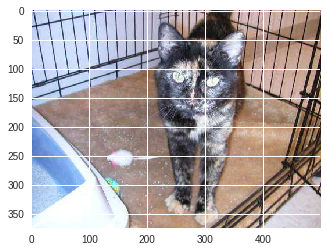

In [28]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [16]:
img.shape

(375, 499, 3)

In [17]:
img[:4,:4]

array([[[195, 208, 214],
        [172, 185, 193],
        [187, 199, 213],
        [131, 142, 162]],

       [[195, 208, 216],
        [178, 191, 200],
        [191, 203, 217],
        [140, 151, 171]],

       [[193, 206, 214],
        [184, 197, 206],
        [196, 208, 222],
        [154, 165, 185]],

       [[188, 201, 210],
        [188, 200, 212],
        [196, 208, 224],
        [170, 181, 203]]], dtype=uint8)

In [18]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:03<00:00, 28886493.83it/s]


100%|██████████| 32/32 [00:15<00:00,  4.11it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.054484   0.027827   0.9885    
    1      0.039061   0.026052   0.9895    



[array([0.02605]), 0.9895]

In [19]:
# This is the label for a val data
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [20]:
# from here we know that 'cats' is label 0 and 'dogs' is label 1.
data.classes

['cats', 'dogs']

In [21]:
# this gives prediction for validation set. Predictions are in log scale
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [22]:
log_preds[:10]

array([[ -0.00054,  -7.53067],
       [ -0.00035,  -7.95465],
       [ -0.00002, -10.86424],
       [ -0.00007,  -9.51858],
       [ -0.00001, -11.14914],
       [ -0.00021,  -8.46972],
       [ -0.00001, -11.52685],
       [ -0.00002, -11.04418],
       [ -0.     , -14.06841],
       [ -0.00006,  -9.78259]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])        # pr(dog)

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], 4, replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

In [0]:
def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])

In [0]:
from PIL import Image as pimage # specific import due to error

def load_img_id(ds, idx): 
  return np.array(pimage.open(PATH+ds.fnames[idx])) # original code is PIL.Image but did not work

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8))

Correctly classified


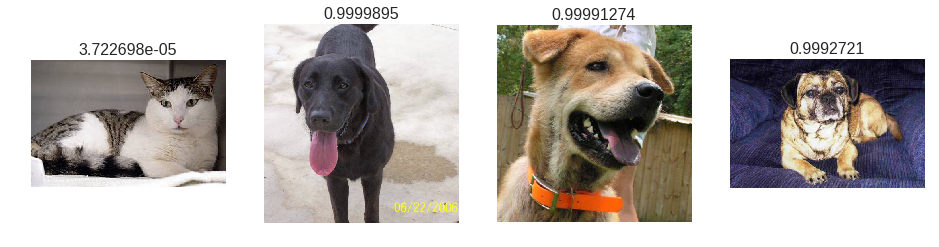

In [43]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

In [0]:
import PIL.Image